# SKLEARN models require two dimension numpy array as inputs. Here is how to convert panda dataframe into 2 dimesnion array target and independent variables


In [11]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['target', 'B', 'C', 'D'])
print("panda dataframe:")
print(df)
y=df['target'].values.reshape(-1,1) #reshape one dimension array into 2 dimension array
print("\ny:")
print(y)
X=df.drop(['target'],axis=1).values  #drop method can drop both row or column, axis=1 means drop column
print("\nX:")
print(X)


panda dataframe:
   target  B   C   D
0       0  1   2   3
1       4  5   6   7
2       8  9  10  11

y:
[[0]
 [4]
 [8]]

X:
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


# Function to draw clasification boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.

    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    return plt

# Load IRIS DATA

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler  #not used in this workbook

iris = load_iris()

y = iris.target
X = iris.data[:, :2]  # we only take the first two features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify=y)


# KNN Model
nonlinear. The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms. There is no need to train a model for generalization, That is why KNN is known as the simple and instance-based learning algorithm. 

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. 

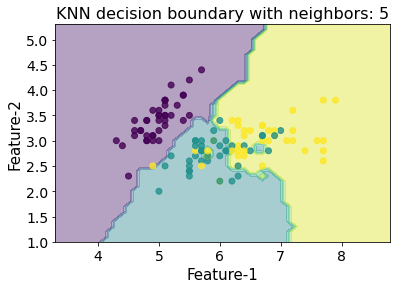

[[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.70      0.70        10
           2       0.70      0.70      0.70        10

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


plt.figure()
plt.title("KNN decision boundary with neighbors: 5",fontsize=16)
plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5) #use odd number for n_neighbors parameter
plt.show()

model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



# Naive Bayes Model

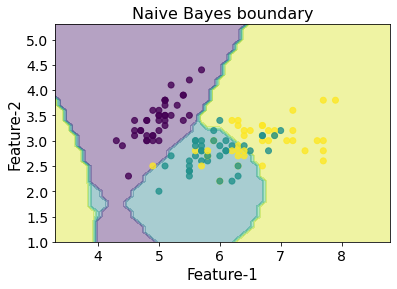

[[10  0  0]
 [ 0  5  5]
 [ 0  4  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.56      0.50      0.53        10
           2       0.55      0.60      0.57        10

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



"\nfrom sklearn.naive_bayes import BernoulliNB\nmodel=ms.GridSearchCV(BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})\nmodel.fit(X_train, y_train)\nmodel.score(X_test, y_test)\n"

In [15]:
#naive_bayes is supervised classification only, use BernoulliNB kernal for binary prediction, use GaussianNB for multi class prediction
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as ms

plt.figure()
plt.title("Naive Bayes boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,GaussianNB)
plt.show()


model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

'''
from sklearn.naive_bayes import BernoulliNB
model=ms.GridSearchCV(BernoulliNB(), param_grid={'alpha':np.logspace(-2., 2., 50)})
model.fit(X_train, y_train)
model.score(X_test, y_test)
'''

# Logistic Regression Model

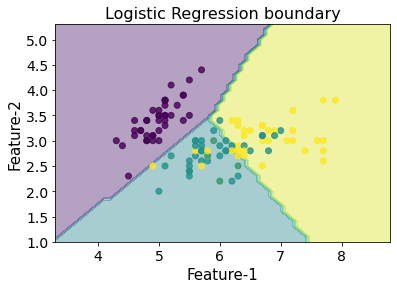

[[10  0  0]
 [ 0  5  5]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.50      0.56        10
           2       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



In [6]:
#sklearn logisticRegression can handle multi-class!
from sklearn.linear_model import LogisticRegression
plt.figure()
plt.title("Logistic Regression boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,LogisticRegression)
plt.show()

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



# Decision Tree Model, easy to explain, be careful not overfit

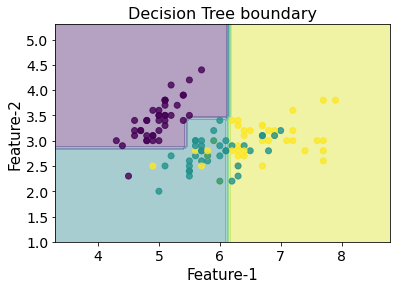

[[10  0  0]
 [ 1  4  5]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.57      0.40      0.47        10
           2       0.58      0.70      0.64        10

    accuracy                           0.70        30
   macro avg       0.69      0.70      0.69        30
weighted avg       0.69      0.70      0.69        30



In [6]:
#overfit a decision tree
from sklearn.tree import DecisionTreeClassifier
plt.figure()
plt.title("Decision Tree boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,DecisionTreeClassifier,max_depth=3,min_samples_leaf=3)
plt.show()

model=DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

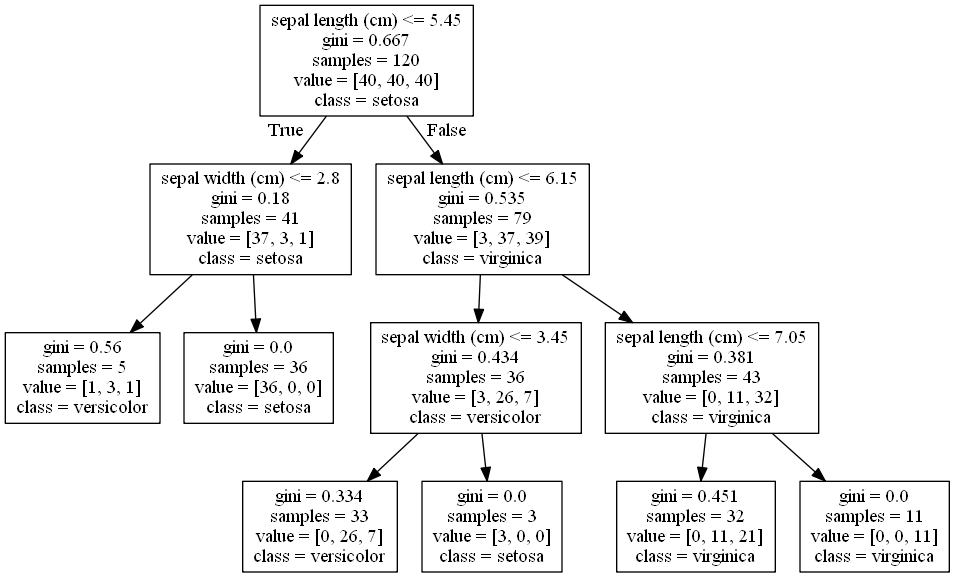

In [7]:
import graphviz
from IPython.display import Image
from sklearn import tree
import pydotplus

dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
dt=dt.fit(X_train,y_train)
tree.export_graphviz(dt, out_file="tree.dot", feature_names=iris.feature_names[:2], class_names=iris.target_names)
graph=pydotplus.graph_from_dot_file("tree.dot")
Image(graph.create_png())

# Random Forest

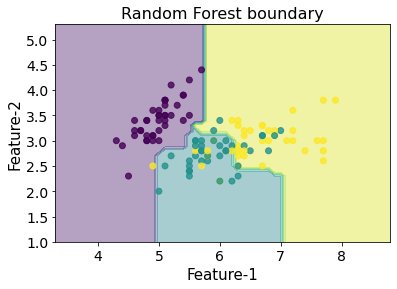

[[9 0 1]
 [1 4 5]
 [0 3 7]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.57      0.40      0.47        10
           2       0.54      0.70      0.61        10

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.66        30
weighted avg       0.67      0.67      0.66        30



In [55]:
from sklearn.ensemble import RandomForestClassifier
plt.figure()
plt.title("Random Forest boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,RandomForestClassifier,max_depth=3,min_samples_leaf=3)
plt.show()

model=RandomForestClassifier(max_depth=3,min_samples_leaf=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Gradient Booting

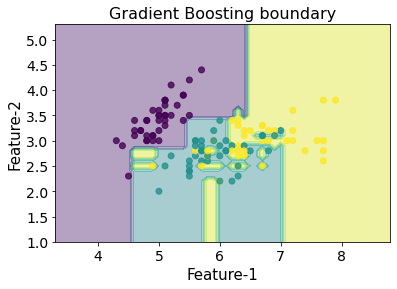

[[10  0  0]
 [ 1  5  4]
 [ 0  5  5]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.50      0.50      0.50        10
           2       0.56      0.50      0.53        10

    accuracy                           0.67        30
   macro avg       0.65      0.67      0.66        30
weighted avg       0.65      0.67      0.66        30



In [48]:
from sklearn.ensemble import GradientBoostingClassifier
plt.figure()
plt.title("Gradient Boosting boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,GradientBoostingClassifier,max_depth=3,min_samples_leaf=3)
plt.show()

model=GradientBoostingClassifier(max_depth=3,min_samples_leaf=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# SVC linear

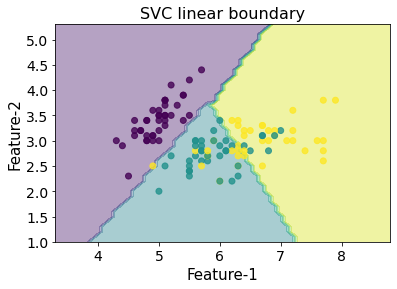

[[10  0  0]
 [ 0  5  5]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.50      0.56        10
           2       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



In [54]:
from sklearn.svm import SVC
plt.figure()
plt.title("SVC linear boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,SVC,kernel='linear')
plt.show()

model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



# SVC Polynomial

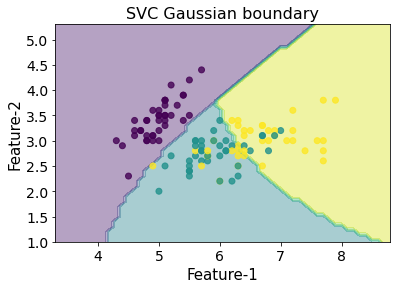

[[10  0  0]
 [ 0  5  5]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.50      0.56        10
           2       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



In [53]:
from sklearn.svm import SVC
plt.figure()
plt.title("SVC polynomial boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,SVC,kernel='poly')  #default degree=3
plt.show()

model=SVC(kernel='poly')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Neural Network

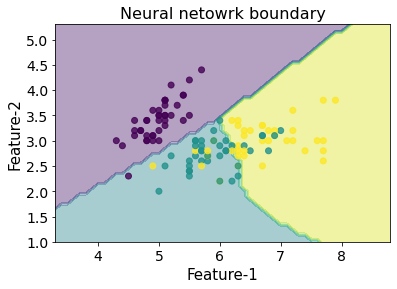

[[10  0  0]
 [ 0  5  5]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.50      0.56        10
           2       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



In [60]:
from sklearn.neural_network import MLPClassifier
plt.figure()
plt.title("Neural netowrk boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,MLPClassifier,max_iter=1000)  
plt.show()

model=MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# LDA

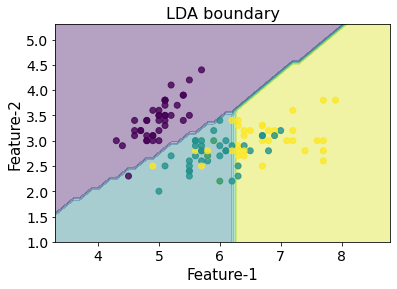

[[10  0  0]
 [ 0  5  5]
 [ 0  3  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.50      0.56        10
           2       0.58      0.70      0.64        10

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30



In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
plt.figure()
plt.title("LDA boundary",fontsize=16)
plot_decision_boundaries(X_train,y_train,LinearDiscriminantAnalysis)  
plt.show()

model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Try the same IRIS dataset with unsupervised classifications

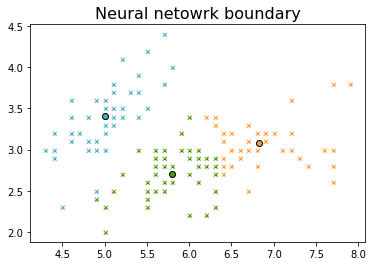

In [74]:
#Overall, KMeans and MiniBatchKMeans are very similiar
#the MiniBatchKMeans is faster, but gives slightly different results (see Mini Batch K-Means).

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

n=3  #number of clusters
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
k_means.fit(X)

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

plt.figure()
plt.title("KMean Cluster",fontsize=16)


for k, col in zip(range(n), colors):
    my_members = k_means_labels == k
    
    #plot one cluster at a time (k)
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='X')
    
    #plot cluster center
    cluster_center = k_means_cluster_centers[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

plt.show()


# DBSCAN

Estimated number of clusters: 2
Estimated number of noise points: 27


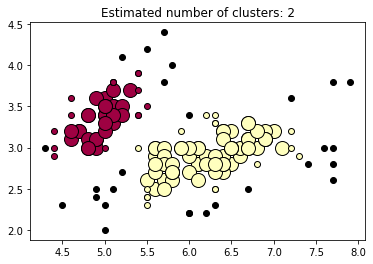

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# Plot result
import matplotlib.pyplot as plt

# Black colr is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

